In this notebook we obtain the likelihood plots for the 2d Scenarios (IV, V, VI and XI).
We first calculate the likelihood in a grid and save the results.

## Calculations

In [1]:
from parscanning import GridScan
from SMEFT19.SMEFTglob import likelihood_fits
from SMEFT19.scenarios import scIV, scV, scVI, scXI
import flavio
import warnings

### Scenario IV

In [2]:
xmin = -2.0
xmax = 2.0
ymin = -2.0
ymax = 2.0
xmargin = 0.02*(xmax-xmin)
ymargin = 0.02*(ymax-ymin)
GS = GridScan(likelihood_fits, [xmin-xmargin, ymin-ymargin], [xmax+xmargin, ymax+ymargin], 50)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    GS.run_mp(4, scIV)
GS.save_csv('../../likelihood/likelihood_IV.dat')

### Scenario V

In [5]:
xmin = -1.0
xmax = 1.0
ymin = -2.0
ymax = 2.0
xmargin = 0.02*(xmax-xmin)
ymargin = 0.02*(ymax-ymin)
GS = GridScan(likelihood_fits, [xmin-xmargin, ymin-ymargin], [xmax+xmargin, ymax+ymargin], 50)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    GS.run_mp(4, scV)
GS.save_csv('../../likelihood/likelihood_V.dat')

### Scenario VI

In [3]:
xmin = -1.0
xmax = 1.0
ymin = -2.0
ymax = 2.0
xmargin = 0.02*(xmax-xmin)
ymargin = 0.02*(ymax-ymin)
GS = GridScan(likelihood_fits, [xmin-xmargin, ymin-ymargin], [xmax+xmargin, ymax+ymargin], 50)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    GS.run_mp(4, scVI)
GS.save_csv('../../likelihood/likelihood_VI.dat')

### Scenario XI

In [6]:
xmin = -1.0
xmax = 1.0
ymin = -2.0
ymax = 2.0
xmargin = 0.02*(xmax-xmin)
ymargin = 0.02*(ymax-ymin)
GS = GridScan(likelihood_fits, [xmin-xmargin, ymin-ymargin], [xmax+xmargin, ymax+ymargin], 50)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    GS.run_mp(4, scXI)
GS.save_csv('../../likelihood/likelihood_XI.dat')

## Plotting

Now we define the function used to read the data for the grids of points and to format it so we can plot it.

In [7]:
import numpy as np
import pandas as pd
from SMEFT19.plots import likelihood_plot

In [8]:
def read_meshgrid(fname, stepx=50, stepy=50):
    zdata = pd.read_csv(fname, sep='\t')
    xcoords = np.linspace(zdata['x'].min(), zdata['x'].max(), stepx)
    ycoords = np.linspace(zdata['y'].min(), zdata['y'].max(), stepy)
    fitcodes = {r'$R_{K^{(*)}}$':'likelihood_lfu_fcnc.yaml', r'$R_{D^{(*)}}$':'likelihood_rd_rds.yaml', 'EW':'likelihood_ewpt.yaml', 'eeWW':'likelihood_eeww.yaml', 'Global':'global'}
    d = {}
    for k, v in zip(fitcodes.keys(), fitcodes.values()):
        z = np.array(zdata[v]).reshape(stepx, stepy)
        d.update({k:z})
    d['EW'] = d['EW'] + d['eeWW']
    d.pop('eeWW')
    return (xcoords, ycoords, d)

### Scenario IV

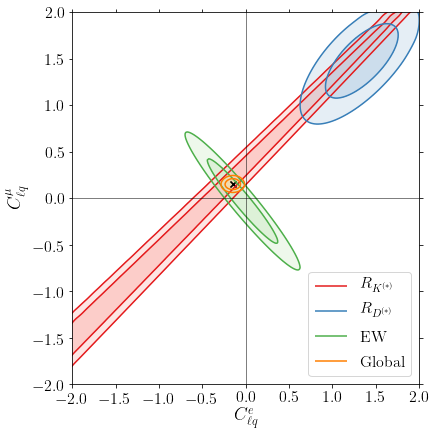

In [9]:
likelihood_plot(read_meshgrid('../../likelihood/likelihood_IV.dat'), -2.0, 2.0, -2.0, 2.0, [r'$C_{\ell q}^e$', r'$C_{\ell q}^\mu$'], locleg='lower right', colors=[0,1,2,4], bf=[-0.1511,0.152], widths=[1.5,]*4, fout='../../plots/scIV')

### Scenario V

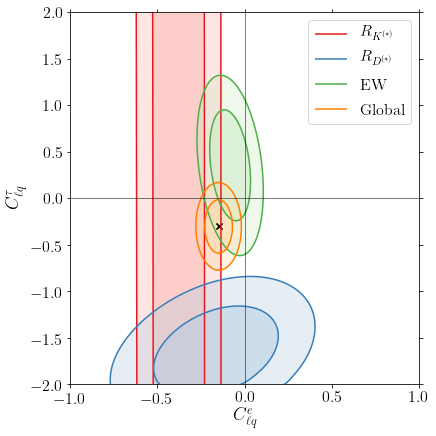

In [10]:
likelihood_plot(read_meshgrid('../../likelihood/likelihood_V.dat'), -1.0, 1.0, -2.0, 2.0, [r'$C_{\ell q}^e$', r'$C_{\ell q}^\tau$'], locleg='upper right', colors=[0,1,2,4], bf=[-0.1467,-0.2998], widths=[1.5,]*4, fout='../../plots/scV')

### Scenario VI

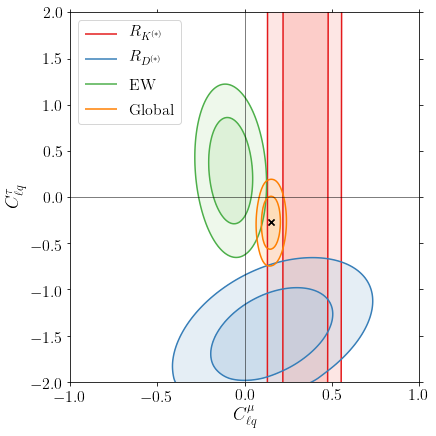

In [11]:
likelihood_plot(read_meshgrid('../../likelihood/likelihood_VI.dat'), -1.0, 1.0, -2.0, 2.0, [r'$C_{\ell q}^\mu$', r'$C_{\ell q}^\tau$'], locleg='upper left', colors=[0,1,2,4], bf=[0.152,-0.271], widths=[1.5,]*4, fout='../../plots/scVI')

### Scenario XI

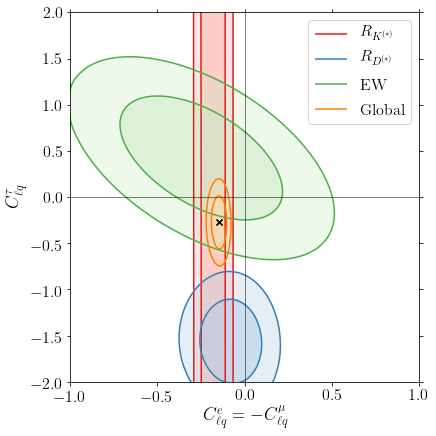

In [13]:
likelihood_plot(read_meshgrid('../../likelihood/likelihood_XI.dat'), -1.0, 1.0, -2.0, 2.0, [r'$C_{\ell q}^e = -C_{\ell q}^\mu$', r'$C_{\ell q}^\tau$'], locleg='upper right', colors=[0,1,2,4], bf=[-0.14988535, -0.26939863], widths=[1.5,]*4, fout='../../plots/scXI')